In [114]:
# Classification Model
#Preprocessing

In [115]:
import pandas as pd

In [116]:
data = pd.read_excel("/content/Copper_Set.xlsx")

In [117]:
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [435]:
data["item_date"].unique()

array([20210401., 19950000., 20210331., 20210330., 20210329., 20210328.,
       20210327., 20210326., 20210325., 20210324., 20210323., 20210322.,
       20210319., 20210318., 20210317., 20210316., 20210315., 20210314.,
       20210313., 20210312., 20210311., 20210310., 20210309., 20210308.,
       20210307., 20210306., 20210305., 20210304., 20210303., 20210302.,
       20210301., 20210228., 20210227., 20210226., 20210225., 20210224.,
       20210223., 20210222., 20210221., 20210220., 20210219., 20210218.,
       20210217., 20210216., 20210215., 20210214., 20210213., 20210212.,
       20210211., 20210210., 20210209., 20210208., 20210207., 20210205.,
       20210204., 20210203., 20210202., 20210201., 20210131., 20210130.,
       20210129., 20210128., 20210127., 20210126., 20210125., 20210124.,
       20210122., 20210121., 20210120., 20210119., 20210118., 20210117.,
       20210116., 20210115., 20210114., 20210113., 20210112., 20210111.,
       20210110., 20210109., 20210108., 20210107., 

In [436]:
data["product_ref"].unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642])

In [437]:
# First we have select the columns.

In [118]:
data.drop(columns = ['material_ref','id',"application"],inplace = True)

In [35]:
data["product_ref"].unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642])

In [42]:
data["delivery date"].unique()

array([20210701., 20210401., 20210101., 20210301., 20210601., 20210501.,
       20210801., 30310101., 20210901., 20211001., 20211101., 20220101.,
       20200701., 20201001., 20200101., 20210201., 20211201., 20190701.,
       20200801., 20201101., 20201201., 20190401., 20200601., 20200401.,
       20200901., 20200501.,       nan, 20212222., 20191001.])

In [43]:
data["item_date"].unique()

array([20210401., 19950000., 20210331., 20210330., 20210329., 20210328.,
       20210327., 20210326., 20210325., 20210324., 20210323., 20210322.,
       20210319., 20210318., 20210317., 20210316., 20210315., 20210314.,
       20210313., 20210312., 20210311., 20210310., 20210309., 20210308.,
       20210307., 20210306., 20210305., 20210304., 20210303., 20210302.,
       20210301., 20210228., 20210227., 20210226., 20210225., 20210224.,
       20210223., 20210222., 20210221., 20210220., 20210219., 20210218.,
       20210217., 20210216., 20210215., 20210214., 20210213., 20210212.,
       20210211., 20210210., 20210209., 20210208., 20210207., 20210205.,
       20210204., 20210203., 20210202., 20210201., 20210131., 20210130.,
       20210129., 20210128., 20210127., 20210126., 20210125., 20210124.,
       20210122., 20210121., 20210120., 20210119., 20210118., 20210117.,
       20210116., 20210115., 20210114., 20210113., 20210112., 20210111.,
       20210110., 20210109., 20210108., 20210107., 

In [49]:
len(data["quantity tons"].unique())

181673

In [50]:
len(data["customer"].unique())

1170

In [119]:
data.drop(columns = ["item_date","country","item type",	'thickness','width','selling_price',"delivery date"], inplace = True)

In [120]:
data

,quantity tons,customer,status,product_ref
0,54.151139,30156308.0,Won,1670798778
1,768.024839,30202938.0,Won,1668701718
2,386.127949,30153963.0,Won,628377
3,202.411065,30349574.0,Won,1668701718
4,785.526262,30211560.0,Won,640665
...,...,...,...,...
181668,102.482422,30200854.0,Won,164141591
181669,208.086469,30200854.0,Won,164141591
181670,4.235594,30200854.0,Won,164141591
181671,-2000,30200854.0,Won,164141591


In [56]:
data.head()

,quantity tons,customer,status,product_ref
0,54.151139,30156308.0,Won,1670798778
1,768.024839,30202938.0,Won,1668701718
2,386.127949,30153963.0,Won,628377
3,202.411065,30349574.0,Won,1668701718
4,785.526262,30211560.0,Won,640665


In [57]:
data["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

In [58]:
data["product_ref"].unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642])

In [441]:
#remove duplicates

In [121]:
data.drop_duplicates()

,quantity tons,customer,status,product_ref
0,54.151139,30156308.0,Won,1670798778
1,768.024839,30202938.0,Won,1668701718
2,386.127949,30153963.0,Won,628377
3,202.411065,30349574.0,Won,1668701718
4,785.526262,30211560.0,Won,640665
...,...,...,...,...
181668,102.482422,30200854.0,Won,164141591
181669,208.086469,30200854.0,Won,164141591
181670,4.235594,30200854.0,Won,164141591
181671,-2000,30200854.0,Won,164141591


In [60]:
data.columns

Index(['quantity tons', 'customer', 'status', 'product_ref'], dtype='object')

In [61]:
data["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

In [122]:
data = data[data['status'].isin(["Won", "Lost"])]

In [123]:
data

,quantity tons,customer,status,product_ref
0,54.151139,30156308.0,Won,1670798778
1,768.024839,30202938.0,Won,1668701718
2,386.127949,30153963.0,Won,628377
3,202.411065,30349574.0,Won,1668701718
4,785.526262,30211560.0,Won,640665
...,...,...,...,...
181668,102.482422,30200854.0,Won,164141591
181669,208.086469,30200854.0,Won,164141591
181670,4.235594,30200854.0,Won,164141591
181671,-2000,30200854.0,Won,164141591


In [64]:
data.isna().sum()

quantity tons    0
customer         1
status           0
product_ref      0
dtype: int64

In [445]:
#we have small number of nan values,insread of taking the average, we can drop it.

In [65]:
data

,quantity tons,customer,status,product_ref
0,54.151139,30156308.0,Won,1670798778
1,768.024839,30202938.0,Won,1668701718
2,386.127949,30153963.0,Won,628377
3,202.411065,30349574.0,Won,1668701718
4,785.526262,30211560.0,Won,640665
...,...,...,...,...
181668,102.482422,30200854.0,Won,164141591
181669,208.086469,30200854.0,Won,164141591
181670,4.235594,30200854.0,Won,164141591
181671,-2000,30200854.0,Won,164141591


In [124]:
data.dropna(subset = "product_ref", inplace = True)
data.dropna(subset = "quantity tons", inplace = True)
data.dropna(subset = "customer", inplace = True)
data.dropna(subset = "status", inplace = True)

<ipython-input-124-8c743449a139>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset = "product_ref", inplace = True)
<ipython-input-124-8c743449a139>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset = "quantity tons", inplace = True)
<ipython-input-124-8c743449a139>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset = "customer", inplace = True)
<ipython-input-124-8c743449a139>:4: Se

In [125]:
data.isna().sum()

quantity tons    0
customer         0
status           0
product_ref      0
dtype: int64

In [126]:
data.isnull().sum()

quantity tons    0
customer         0
status           0
product_ref      0
dtype: int64

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150447 entries, 0 to 181672
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  150447 non-null  object 
 1   customer       150447 non-null  float64
 2   status         150447 non-null  object 
 3   product_ref    150447 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [450]:
#we have to check the values of zero,if value zero is corect we should leave as it is ,if it is not correct we have to drop it

In [127]:
columns = ["quantity tons","product_ref",'customer']
for i in columns:
  zero = data[data[i] == 0]

In [128]:
zero

,quantity tons,customer,status,product_ref


In [129]:
columns = ["quantity tons","product_ref"]
for i in columns:
  zero = data[data[i] == 0]

In [130]:
zero

,quantity tons,customer,status,product_ref


In [456]:
# the quantity tons are in object we have to check their are any letter in the rows because the quantity tones should be in int or float.

In [131]:
data[data["quantity tons"].astype(str).str.isalpha()]

,quantity tons,customer,status,product_ref
173086,e,30157111.0,Won,164141591


In [132]:
data.drop(data[data["quantity tons"].astype(str).str.isalpha()].index,axis = 0, inplace = True)

<ipython-input-132-317614b89cf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data["quantity tons"].astype(str).str.isalpha()].index,axis = 0, inplace = True)


In [133]:
data[data["quantity tons"].astype(str).str.isalpha()]

,quantity tons,customer,status,product_ref


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150446 entries, 0 to 181672
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  150446 non-null  object 
 1   customer       150446 non-null  float64
 2   status         150446 non-null  object 
 3   product_ref    150446 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [461]:
# again it showing qbject data type in quantity tons
#now we can understand that quantity tons columns as converted into object
# for that we have to convert object into int or float

In [135]:
data["quantity tons"].dtype

dtype('O')

In [136]:
#data["quantity tons"] = pd.to_numeric(data["quantity tons"], errors = "coerce")
data["quantity tons"] = data["quantity tons"].astype(float)

<ipython-input-136-5ad28216c3d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["quantity tons"] = data["quantity tons"].astype(float)


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150446 entries, 0 to 181672
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  150446 non-null  float64
 1   customer       150446 non-null  float64
 2   status         150446 non-null  object 
 3   product_ref    150446 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 5.7+ MB


In [83]:
data

,quantity tons,customer,status,product_ref
0,54.151139,30156308.0,Won,1670798778
1,768.024839,30202938.0,Won,1668701718
2,386.127949,30153963.0,Won,628377
3,202.411065,30349574.0,Won,1668701718
4,785.526262,30211560.0,Won,640665
...,...,...,...,...
181668,102.482422,30200854.0,Won,164141591
181669,208.086469,30200854.0,Won,164141591
181670,4.235594,30200854.0,Won,164141591
181671,-2000.000000,30200854.0,Won,164141591


In [466]:
data[data["status"] == "Won"]

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price
0,54.151139,28.0,Won,W,2.00,1500.0,1670798778,854.00
1,768.024839,25.0,Won,W,0.80,1210.0,1668701718,1047.00
2,386.127949,30.0,Won,WI,0.38,952.0,628377,644.33
3,202.411065,32.0,Won,S,2.30,1317.0,1668701718,768.00
4,785.526262,28.0,Won,W,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...
181668,102.482422,25.0,Won,W,0.96,1220.0,164141591,591.00
181669,208.086469,25.0,Won,W,0.95,1500.0,164141591,589.00
181670,4.235594,25.0,Won,W,0.71,1250.0,164141591,619.00
181671,-2000.000000,25.0,Won,W,0.85,1250.0,164141591,601.00


In [84]:
data.corr()

<ipython-input-84-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,quantity tons,customer,product_ref
quantity tons,1.000000,0.004425,0.010514
customer,0.004425,1.000000,-0.003336
product_ref,0.010514,-0.003336,1.000000


In [85]:
data.columns

Index(['quantity tons', 'customer', 'status', 'product_ref'], dtype='object')

<ipython-input-469-b5a690243661>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["width"])


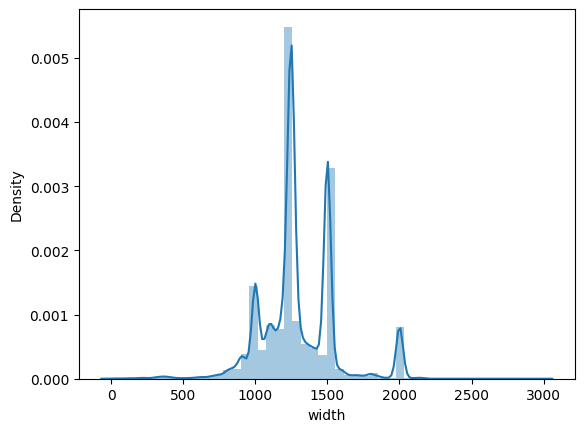

<ipython-input-469-b5a690243661>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["thickness"])


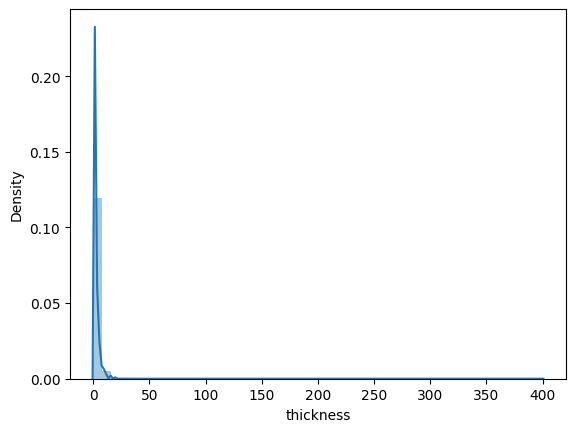

<ipython-input-469-b5a690243661>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["country"])


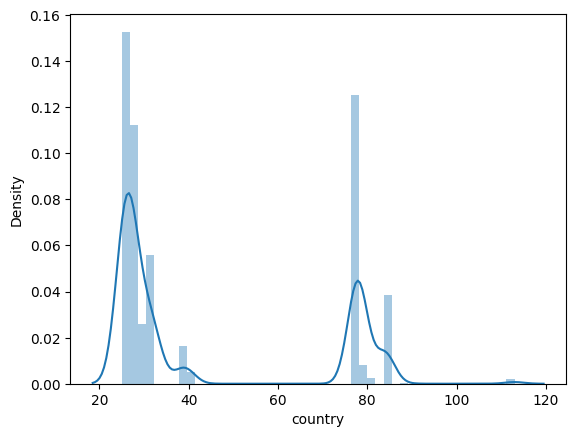

<ipython-input-469-b5a690243661>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["quantity tons"])


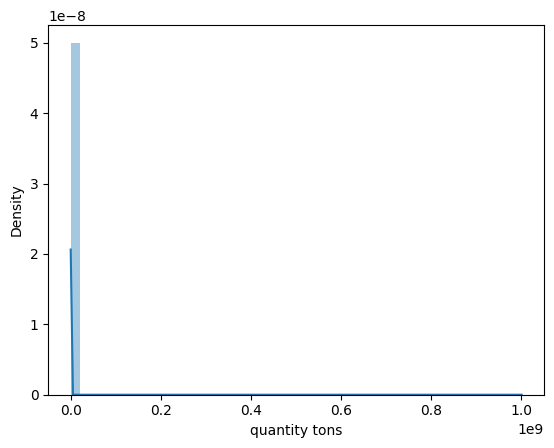

<ipython-input-469-b5a690243661>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["selling_price"])


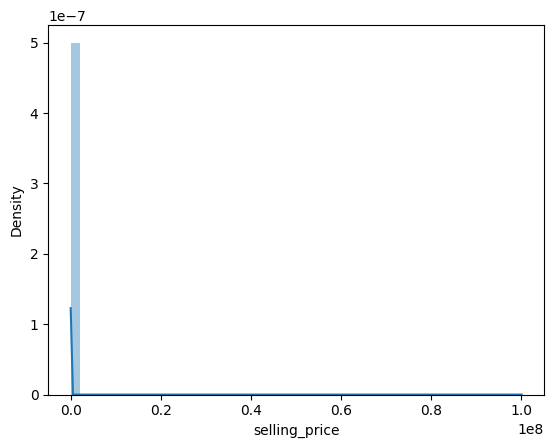

<ipython-input-469-b5a690243661>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["product_ref"])


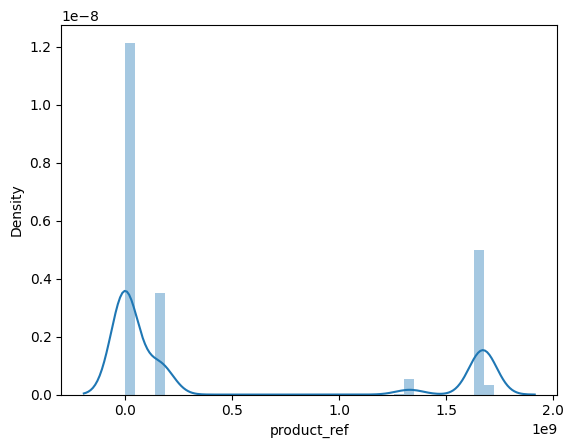

In [469]:
# # now we have check the skewness in the data
# # to know the skewness we have to plot
# import matplotlib.pyplot as plt
# import seaborn as sns
# import seaborn as sns
# sns.distplot(data["width"])
# plt.show()
# sns.distplot(data["thickness"])
# plt.show()
# sns.distplot(data["country"])
# plt.show()
# sns.distplot(data["quantity tons"])
# plt.show()
# sns.distplot(data["selling_price"])
# plt.show()
# sns.distplot(data["product_ref"])
# plt.show()


In [470]:
#  now we have to check the outliers

<Axes: >

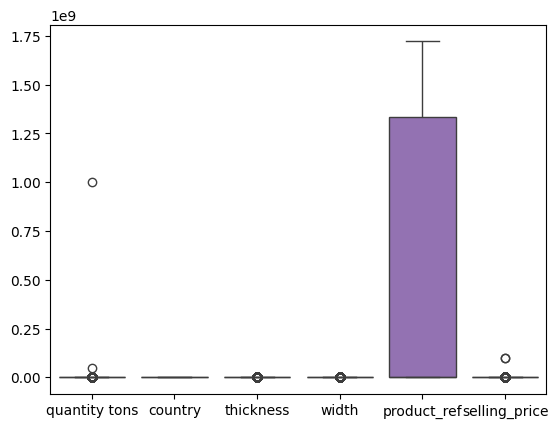

In [471]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.boxplot(data = data)

In [472]:
# we have to check one by one

<Axes: ylabel='quantity tons'>

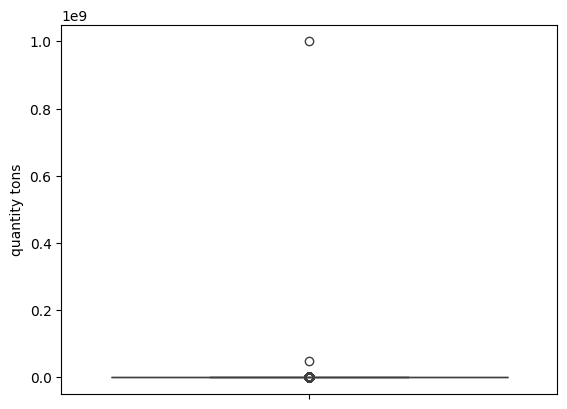

In [473]:
# sns.boxplot(data["quantity tons"])

<Axes: ylabel='thickness'>

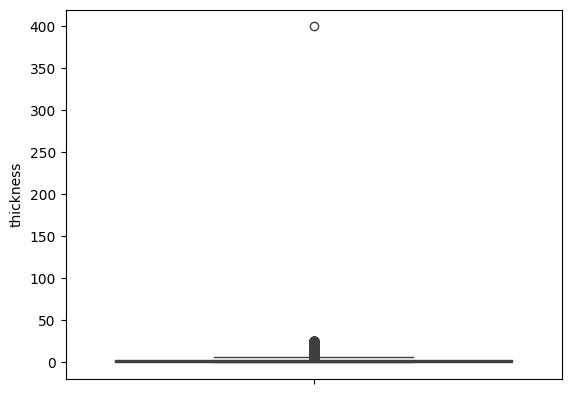

In [474]:
# sns.boxplot(data["thickness"])

<Axes: ylabel='width'>

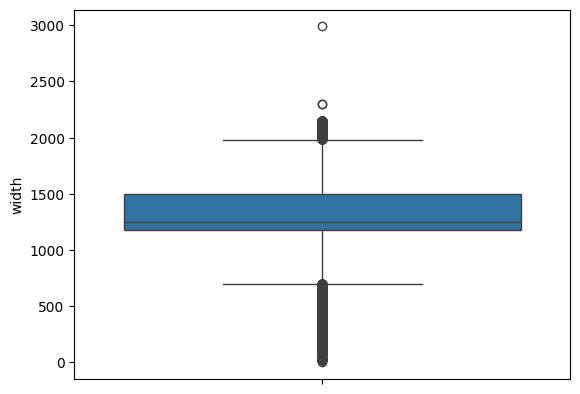

In [475]:
# sns.boxplot(data["width"])

<Axes: ylabel='product_ref'>

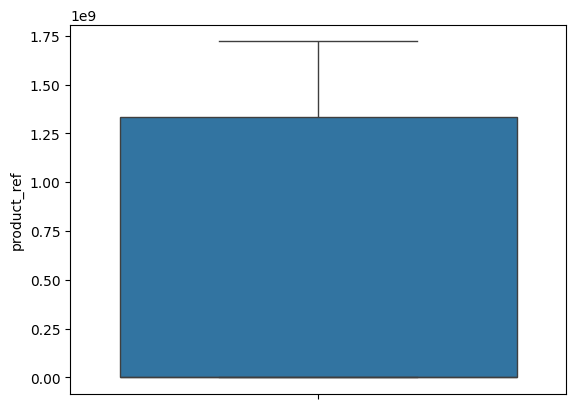

In [476]:
# sns.boxplot(data["product_ref"])

In [477]:
# I am training the model without removing or treating the outliers

In [478]:
# Before training the model we have check the data weather train data are in int or not ,if theiris in object means we have to scale it

In [137]:
data.columns

Index(['quantity tons', 'customer', 'status', 'product_ref'], dtype='object')

In [139]:
data.head(2)

,quantity tons,customer,status,product_ref
0,54.151139,30156308.0,Won,1670798778
1,768.024839,30202938.0,Won,1668701718


In [140]:
data

,quantity tons,customer,status,product_ref
0,54.151139,30156308.0,Won,1670798778
1,768.024839,30202938.0,Won,1668701718
2,386.127949,30153963.0,Won,628377
3,202.411065,30349574.0,Won,1668701718
4,785.526262,30211560.0,Won,640665
...,...,...,...,...
181668,102.482422,30200854.0,Won,164141591
181669,208.086469,30200854.0,Won,164141591
181670,4.235594,30200854.0,Won,164141591
181671,-2000.000000,30200854.0,Won,164141591


In [141]:
data[data['quantity tons'] <= 0]

,quantity tons,customer,status,product_ref
105730,-4.0,30203192.0,Won,1332077137
181661,-18.0,30200854.0,Won,164141591
181671,-2000.0,30200854.0,Won,164141591


In [142]:
# data[data['thickness'] <= 0]

In [143]:
# data[data['width'] <= 0]

In [144]:
# data[data['selling_price'] <= 0]

In [145]:
# data[data['country'] <= 0]

In [146]:
data[data['product_ref'] <= 0]

,quantity tons,customer,status,product_ref


In [147]:
skew = data['quantity tons'] <= 0
print(skew)

0         False
1         False
2         False
3         False
4         False
          ...  
181668    False
181669    False
181670    False
181671     True
181672    False
Name: quantity tons, Length: 150446, dtype: bool


In [148]:
skew = data['quantity tons'] <= 0
print(skew.sum())
# data.loc[skew, 'quantity tons'] = np.nan
skew
skew = data['product_ref'] <= 0
print(skew.sum())

skew = data['customer'] <= 0
print(skew.sum())

3
0
0


In [149]:
data.drop(data[data['quantity tons'] <= 0].index,axis = 0, inplace = True)

<ipython-input-149-134de82d2d1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['quantity tons'] <= 0].index,axis = 0, inplace = True)


In [87]:
data

,quantity tons,customer,status,product_ref
0,54.151139,30156308.0,Won,1670798778
1,768.024839,30202938.0,Won,1668701718
2,386.127949,30153963.0,Won,628377
3,202.411065,30349574.0,Won,1668701718
4,785.526262,30211560.0,Won,640665
...,...,...,...,...
181667,106.783299,30200854.0,Won,164141591
181668,102.482422,30200854.0,Won,164141591
181669,208.086469,30200854.0,Won,164141591
181670,4.235594,30200854.0,Won,164141591


In [151]:
data.dropna(inplace = True)

<ipython-input-151-48a623a66630>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


In [496]:
# taking log to distribute
import numpy as np
# data["quantity tons"] = np.log(data["quantity tons"])
# data["thickness"] = np.log(data["thickness"])
# data["width"] = np.log(data["width"])
# data["item type"] = np.log(data["item type"])
# data["product_ref"] = np.log(data["product_ref"])
# data["selling_price"] = np.log(data["selling_price"])

In [89]:
data

,quantity tons,customer,status,product_ref
0,54.151139,30156308.0,Won,1670798778
1,768.024839,30202938.0,Won,1668701718
2,386.127949,30153963.0,Won,628377
3,202.411065,30349574.0,Won,1668701718
4,785.526262,30211560.0,Won,640665
...,...,...,...,...
181667,106.783299,30200854.0,Won,164141591
181668,102.482422,30200854.0,Won,164141591
181669,208.086469,30200854.0,Won,164141591
181670,4.235594,30200854.0,Won,164141591


<ipython-input-498-3e55a6b2206a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["quantity tons"])


<Axes: xlabel='quantity tons', ylabel='Density'>

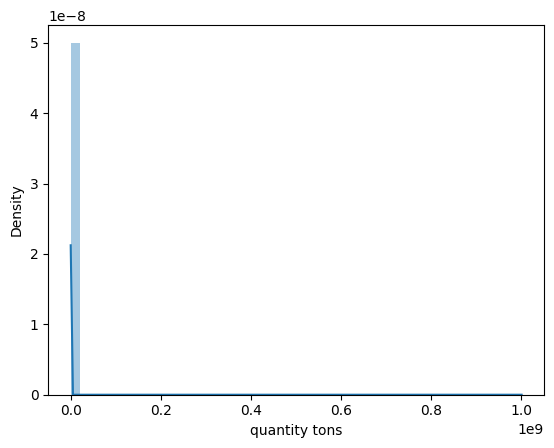

In [498]:
# sns.distplot(data["quantity tons"])

<ipython-input-499-f3c56218fbba>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["selling_price"])


<Axes: xlabel='selling_price', ylabel='Density'>

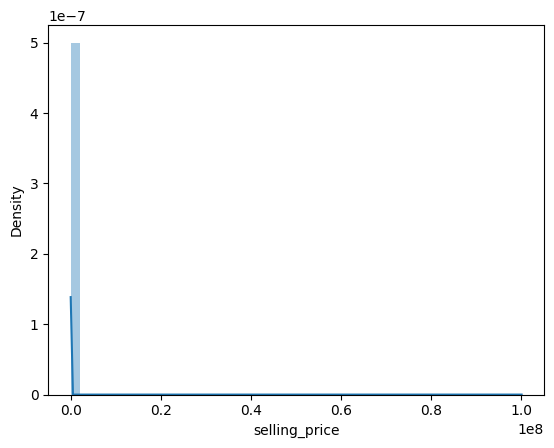

In [499]:
# sns.distplot(data["selling_price"])

In [500]:
# columns = ["quantity tons","country", "thickness", "width", "product_ref"]

<Axes: ylabel='quantity tons'>

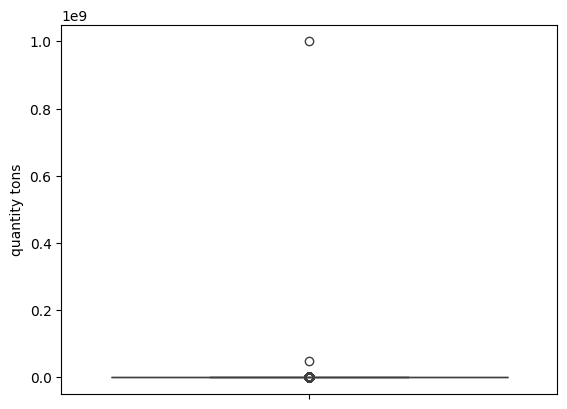

In [501]:
# sns.boxplot(data["quantity tons"])

In [502]:
def remove_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data

In [503]:
# data = remove_outliers(data, columns)

In [152]:
data

,quantity tons,customer,status,product_ref
0,54.151139,30156308.0,Won,1670798778
1,768.024839,30202938.0,Won,1668701718
2,386.127949,30153963.0,Won,628377
3,202.411065,30349574.0,Won,1668701718
4,785.526262,30211560.0,Won,640665
...,...,...,...,...
181667,106.783299,30200854.0,Won,164141591
181668,102.482422,30200854.0,Won,164141591
181669,208.086469,30200854.0,Won,164141591
181670,4.235594,30200854.0,Won,164141591


In [153]:
data.drop_duplicates()

,quantity tons,customer,status,product_ref
0,54.151139,30156308.0,Won,1670798778
1,768.024839,30202938.0,Won,1668701718
2,386.127949,30153963.0,Won,628377
3,202.411065,30349574.0,Won,1668701718
4,785.526262,30211560.0,Won,640665
...,...,...,...,...
181667,106.783299,30200854.0,Won,164141591
181668,102.482422,30200854.0,Won,164141591
181669,208.086469,30200854.0,Won,164141591
181670,4.235594,30200854.0,Won,164141591


<Axes: ylabel='width'>

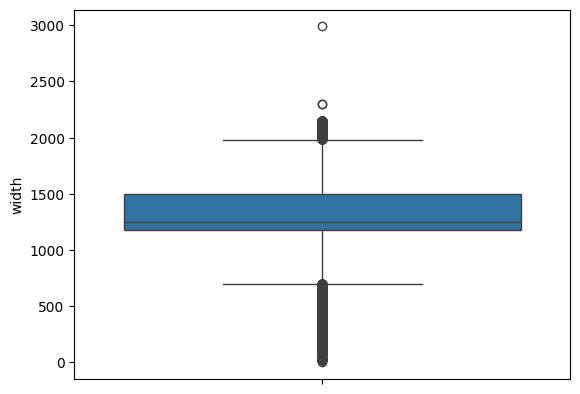

In [506]:
import seaborn as sns
# sns.boxplot(data["width"])

{'whiskers': [<matplotlib.lines.Line2D at 0x780fa298dea0>,
 'caps': [<matplotlib.lines.Line2D at 0x780fa298e3e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x780fa298dc00>],
 'medians': [<matplotlib.lines.Line2D at 0x780fa298e920>],
 'fliers': [<matplotlib.lines.Line2D at 0x780fa298ebc0>],
 'means': []}

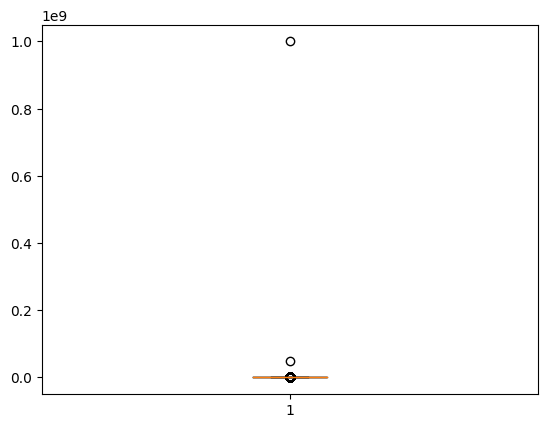

In [507]:
# import matplotlib.pyplot as plt
# plt.boxplot(data["quantity tons"])

In [508]:
# data.to_csv("F_Copper.csv",index = False )

In [154]:
data.isna().sum()

quantity tons    0
customer         0
status           0
product_ref      0
dtype: int64

In [155]:
data

,quantity tons,customer,status,product_ref
0,54.151139,30156308.0,Won,1670798778
1,768.024839,30202938.0,Won,1668701718
2,386.127949,30153963.0,Won,628377
3,202.411065,30349574.0,Won,1668701718
4,785.526262,30211560.0,Won,640665
...,...,...,...,...
181667,106.783299,30200854.0,Won,164141591
181668,102.482422,30200854.0,Won,164141591
181669,208.086469,30200854.0,Won,164141591
181670,4.235594,30200854.0,Won,164141591


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [157]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['customer'] = label_encoder.fit_transform(data['customer'])

<ipython-input-157-3db764f1d099>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['customer'] = label_encoder.fit_transform(data['customer'])


In [158]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['product_ref'] = label_encoder.fit_transform(data['product_ref'])

<ipython-input-158-89b539a2fbf1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['product_ref'] = label_encoder.fit_transform(data['product_ref'])


In [159]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['status'] = label_encoder.fit_transform(data['status'])

<ipython-input-159-027a705949c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['status'] = label_encoder.fit_transform(data['status'])


In [160]:
data

,quantity tons,customer,status,product_ref
0,54.151139,50,1,23
1,768.024839,285,1,21
2,386.127949,38,1,5
3,202.411065,923,1,21
4,785.526262,392,1,8
...,...,...,...,...
181667,106.783299,220,1,9
181668,102.482422,220,1,9
181669,208.086469,220,1,9
181670,4.235594,220,1,9


In [519]:
data["item type"].unique()

array([5, 6, 3, 1, 2, 0, 4])

In [520]:
data["product_ref"].unique()

array([23, 21,  5,  8,  2, 19,  9, 24, 14,  7, 28, 16, 13, 20,  4, 26,  3,
        6, 25, 10, 15, 11,  0, 30, 29,  1, 27, 31, 12, 22, 17, 18])

In [521]:
data["status"].unique()

array([1, 0])

In [522]:
# X = data[['quantity tons','thickness', 'width','country','product_ref']]
# scaler = StandardScaler()
# P = scaler.fit_transform(X)

In [97]:
data

,quantity tons,customer,status,product_ref
0,54.151139,50,1,23
1,768.024839,285,1,21
2,386.127949,38,1,5
3,202.411065,923,1,21
4,785.526262,392,1,8
...,...,...,...,...
181667,106.783299,220,1,9
181668,102.482422,220,1,9
181669,208.086469,220,1,9
181670,4.235594,220,1,9


In [524]:
# X = (data[['quantity tons', 'thickness', 'width','country',"selling_price"]])
# scaler = StandardScaler()
# scaled = scaler.fit_transform(X)

In [525]:
# import numpy as np
# K  =  np.concatenate([scaled, data[["item type","product_ref","status"]].values], axis=1)


In [526]:
# K

In [527]:
#data = pd.DataFrame(K,columns = ['quantity tons', 'thickness', 'width','country',"selling_price","item type","product_ref","status"])

In [161]:
data

,quantity tons,customer,status,product_ref
0,54.151139,50,1,23
1,768.024839,285,1,21
2,386.127949,38,1,5
3,202.411065,923,1,21
4,785.526262,392,1,8
...,...,...,...,...
181667,106.783299,220,1,9
181668,102.482422,220,1,9
181669,208.086469,220,1,9
181670,4.235594,220,1,9


In [162]:
data.isna().sum()

quantity tons    0
customer         0
status           0
product_ref      0
dtype: int64

In [163]:
X = data[["quantity tons","customer","product_ref"]]
Y = data[["status"]]

In [164]:
#Splitting Data into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [532]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)

In [533]:
X_train.shape

(105303, 7)

In [534]:
# d_t_r = DecisionTreeRegressor()
# parameter_grid_value = {
#     'max_depth': [2, 5, 10, 20, None],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 4, 8],
#     'max_features': ['auto', 'sqrt', 'log2', None],
#     'criterion': ['mse', 'friedman_mse', 'mae']
# }


# grid_search_cv = GridSearchCV(estimator=d_t_r, param_grid=parameter_grid_value, cv=5)
# grid_search_cv.fit(X_train, y_train)

# best_parameters = grid_search_cv.best_params_
# print("Best HyperParameters:", best_parameters)
# crt_model = grid_search_cv.best_estimator_

In [535]:
from sklearn.tree import DecisionTreeClassifier

In [536]:
Model_C = DecisionTreeClassifier(criterion='gini',max_depth =35, min_samples_leaf=5,min_samples_split=4)
Model_C.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=35, min_samples_leaf=5, min_samples_split=4)

In [537]:
from sklearn.ensemble import AdaBoostClassifier
Model_C = AdaBoostClassifier()
Model_C.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [538]:
from sklearn.ensemble import GradientBoostingClassifier
Model_C = GradientBoostingClassifier()
Model_C.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [539]:
from xgboost  import XGBClassifier
Model_C = XGBClassifier()
Model_C.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [173]:
from sklearn.ensemble import RandomForestClassifier
Model_C = RandomForestClassifier()
Model_C.fit(X_train,y_train)
from sklearn.metrics import accuracy_score,f1_score
y_predicted_values = Model_C.predict(X_test)
print(Model_C)
#Evaluating
Accuracy = accuracy_score(y_test, y_predicted_values)
f1 = f1_score(y_test, y_predicted_values)
print('Accuracy_Score is : ', Accuracy)
print('F1-score value is : ', f1)
from sklearn.metrics import confusion_matrix
Q = confusion_matrix(y_test, y_predicted_values)
print(pd.DataFrame(Q))

<ipython-input-173-a69959092455>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Model_C.fit(X_train,y_train)


RandomForestClassifier()
Accuracy_Score is :  0.8775618726873906
F1-score value is :  0.9213895527483783
      0      1
0  7222   3191
1  2335  32385


In [166]:
data.sort_values(by="quantity tons")


,quantity tons,customer,status,product_ref
173317,0.000010,646,0,5
160036,0.000891,93,1,8
48674,0.001868,249,1,5
80139,0.001950,131,1,8
108980,0.004465,73,1,8
...,...,...,...,...
100248,29528.148715,192,1,5
175802,30004.607431,820,1,8
176479,36000.630171,820,1,8
100256,47758.486833,192,1,9


In [543]:
import sklearn
print(sklearn.__version__)

1.2.2


In [167]:
from sklearn.metrics import confusion_matrix
Q = confusion_matrix(y_test, y_predicted_values)
pd.DataFrame(Q)

,0,1
0,7207,3206
1,2318,32402


In [168]:
X.columns

Index(['quantity tons', 'customer', 'product_ref'], dtype='object')

In [169]:
feature_importances = pd.Series(Model_C.feature_importances_)
print(feature_importances)

0    0.460714
1    0.445565
2    0.093721
dtype: float64


In [174]:
data

,quantity tons,customer,status,product_ref
0,54.151139,50,1,23
1,768.024839,285,1,21
2,386.127949,38,1,5
3,202.411065,923,1,21
4,785.526262,392,1,8
...,...,...,...,...
181667,106.783299,220,1,9
181668,102.482422,220,1,9
181669,208.086469,220,1,9
181670,4.235594,220,1,9


In [175]:
data.to_csv("F_C_Copper.csv",index = False)

In [178]:
import pickle

with open("Model_C.pkl", "wb") as file:
    pickle.dump(Model_C, file)


In [180]:
len(data["customer"].unique())

1124

In [182]:
print(data["quantity tons"].values[:50])


[ 54.15113862 768.0248392  386.12794891 202.41106541 785.52626157
 225.79067611 113.38712363  69.0718528  630.6269167  113.99566554
  27.51254472  32.23531688  35.31033249  75.12439366  20.80711354
  53.58103351  71.36697792 471.83818036  53.72974562  79.33399031
 179.58279605 927.43074747  99.05919889 185.14965601 102.42177284
  75.75766317 179.7245138  207.77670651  29.01093671  92.7172555
  44.77285681  52.65787989  59.90735531 540.75491108  56.8313529
  49.7045555  181.91084181  26.53371627 132.88411415 126.77620144
  27.74322116  30.89994963 371.65571216  62.57489188  37.87714559
 204.2589525   43.48741555 425.02618288 901.30462426 835.3378492 ]
